In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
import datetime
from datetime import timedelta
# from datetime import datetime, date
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import os

In [3]:
pwd

'/home/miwoos'

In [4]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/')

In [3]:
# os.chdir('G:\내 드라이브\제주_전기차\data')

In [5]:
ls

 elecafe.csv                       전기차관련검색어인기순.csv
 관련키워드.csv                    전기차관심도지역.csv
 네이버-제주전기차후기통합.csv     전기차관심증가.csv
 느영나영전기차크롤링.csv          전기차키워드관련주제인기순.csv
 느영나영전기차크롤링.csv.part     전체본문의댓글결과_2022.03.06.xlsx
'본문 검색 결과_2022.03.06.xlsx'   제사모크롤링.csv
'전기차 동호회 전기차크롤링.csv'   투플럭스sjeju.csv


In [6]:
df_cafe = pd.read_csv('elecafe.csv')

In [7]:
df_cafe.head(3)

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,2022.03,제사모
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,NaN,중고자동차 매물,62,2022.03.16.,2022.03,제사모


In [8]:
df_elecafe = pd.read_csv('투플럭스sjeju.csv')

In [9]:
df_elecafe.head(3)

,제목,카페명,작성날짜,내용,조회수,긍부정,Url,월
0,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,전기차동호회,2020-05-13 15:19:00,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,2461,P,https://cafe.naver.com/allfm01/463393,2020.05
1,코나 급발진 실화냐,전기차동호회,2021-03-04 21:15:00,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,753,N,https://cafe.naver.com/allfm01/577259,2021.03
2,약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 2020년...,전기차동호회,2020-01-03 04:57:00,▶ 약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 202...,690,P,https://cafe.naver.com/allfm01/413286,2020.01


## 월별 년별 로 바꾸기

In [12]:
df_elecafe[""]= str(df_elecafe.작성날짜[0]).replace('-','.')[:7]

In [13]:
df_elecafe['월'] = df_elecafe['작성날짜'].apply(lambda x : str(x).replace('-','.')[:7])

In [43]:
df_elecafe['년'] = df_elecafe['작성날짜'].apply(lambda x : str(x).replace('-','.')[:4])

In [16]:
ls

 elecafe.csv                       전기차관련검색어인기순.csv
 관련키워드.csv                    전기차관심도지역.csv
 네이버-제주전기차후기통합.csv     전기차관심증가.csv
 느영나영전기차크롤링.csv          전기차키워드관련주제인기순.csv
 느영나영전기차크롤링.csv.part     전체본문의댓글결과_2022.03.06.xlsx
'본문 검색 결과_2022.03.06.xlsx'   제사모크롤링.csv
'전기차 동호회 전기차크롤링.csv'   투플럭스sjeju.csv


In [23]:
# df_elecafe.to_csv('투플럭스sjeju.csv',index=False)

In [44]:
df_elecafe.head(3)

,제목,카페명,작성날짜,내용,조회수,긍부정,Url,월,년
0,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,전기차동호회,2020-05-13 15:19:00,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,2461,P,https://cafe.naver.com/allfm01/463393,2020.05,2020
1,코나 급발진 실화냐,전기차동호회,2021-03-04 21:15:00,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,753,N,https://cafe.naver.com/allfm01/577259,2021.03,2021
2,약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 2020년...,전기차동호회,2020-01-03 04:57:00,▶ 약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 202...,690,P,https://cafe.naver.com/allfm01/413286,2020.01,2020


<Figure size 1080x720 with 0 Axes>

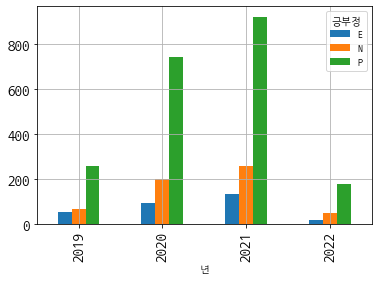

In [55]:
plt.figure(figsize=(15,10))
df_elecafe.groupby([df_elecafe.년,df_elecafe.긍부정]).긍부정.count().unstack().plot.bar(fontsize=15)
plt.grid()

In [62]:
df_cafe.head(2)

,제목,내용,댓글,유형,조회수,작성날짜,카페명
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,제사모
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,제사모


In [21]:
'hi'.__contains__('i')

True

In [40]:
df_cafe.내용.str.contains('전기차').value_counts()

True     3069
False    2732
Name: 내용, dtype: int64

In [58]:
df_cafe['월별']=df_cafe.작성날짜.apply()

0       2022.03
1       2022.03
2       2022.03
3       2022.03
4       2022.03
         ...   
5910        NaN
5911        NaN
5912        NaN
5913        NaN
5914        NaN
Name: 월별, Length: 5915, dtype: float64

In [ ]:
df_cafe['년']=df_cafe.작성날짜.apply()